<a href="https://colab.research.google.com/github/mobilttterbang/Stunting_Classification_Project/blob/main/ML-Stunting_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Essential librabries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# Modelling
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount drive to save/upload file permanently after upload it to gdrive
from google.colab import drive
drive.mount('/content/drive/')

# List all files from dir and change dir
!ls "/content/drive/My Drive/PKL"
%cd /content/drive/My Drive/PKL

In [ ]:
pd.set_option('display.max_columns', 12)

In [ ]:
# read data
df = pd.read_csv('data_stunting_yk_v02_12092023.csv')

In [ ]:
df

,Puskesmas,Kelurahan,Balita,Balita_ditimbang,BeratSK,BeratK,BeratN,Beresiko,TinggiSP,TinggiP,TinggiN,TinggiT,GiziB,GiziK,GiziN,GiziL,Obesitas,Wasting,Tahun,Zona
0,Mantrijeron,Gedongkiwo,449,264,9,29,214,12,12,39,213,0,6,16,228,4,3,22,2021,Merah
1,Mantrijeron,Suryodiningratan,469,289,3,23,240,23,12,30,238,1,6,16,215,12,8,22,2021,Jingga
2,Mantrijeron,Mantrijeron,364,265,4,25,209,27,2,34,229,0,1,12,225,7,7,13,2021,Jingga
3,Kraton,Patehan,178,155,1,14,119,21,2,17,122,4,3,11,102,10,2,14,2021,Jingga
4,Kraton,Panembahan,216,173,3,7,143,20,5,22,142,2,1,9,128,8,6,10,2021,Jingga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,Jetis,Cokrodiningratan,264,236,1,33,182,20,5,23,207,1,1,17,188,7,2,18,2023,Jingga
131,Tegalrejo,Kricak,545,452,8,56,361,32,11,60,381,0,0,30,377,8,12,30,2023,Merah
132,Tegalrejo,Karangwaru,278,219,3,23,175,18,7,22,190,0,0,9,176,8,4,9,2023,Jingga
133,Tegalrejo,Tegalrejo,323,305,3,28,243,31,11,39,255,0,1,8,250,7,8,9,2023,Merah


## EDA

In [ ]:
berat_kurang = df['BeratSK'] + df['BeratK']
tinggi_kurang = df['TinggiSP'] + df['TinggiP']
gizi_kurang = df['GiziB'] + df['GiziK']

df_berat_kurang = df[['Kelurahan','Tahun']].copy()
df_berat_kurang['berat_kurang'] = berat_kurang.copy()

df_tinggi_kurang = df[['Kelurahan','Tahun']].copy()
df_tinggi_kurang['tinggi_kurang'] = tinggi_kurang.copy()

df_gizi_kurang = df[['Kelurahan','Tahun']].copy()
df_gizi_kurang['gizi_kurang'] = gizi_kurang.copy()

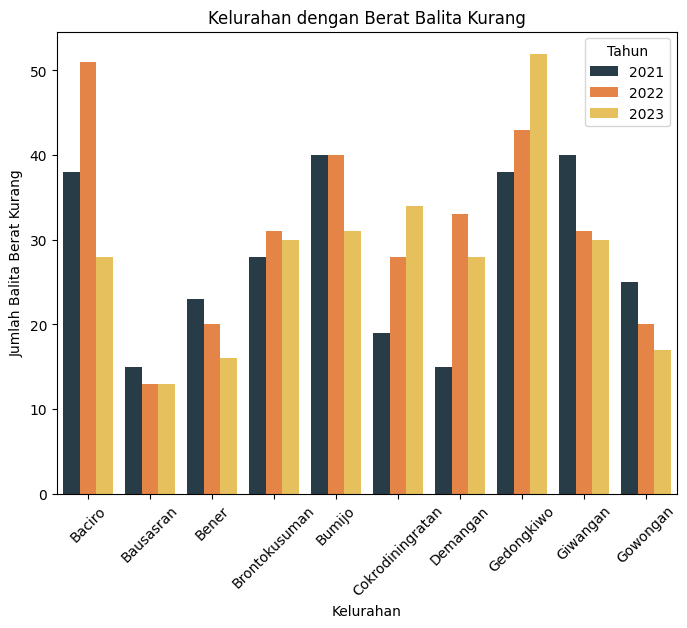

In [ ]:
# UNDERWEIGHT
df_berat_kurang.sort_values(by=['Kelurahan','berat_kurang'], ascending=[True,False], inplace=True)
df_berat_kurang_group = df_berat_kurang.groupby(['Kelurahan','Tahun']).first().reset_index()
df_berat_kurang_group.reset_index(drop=True, inplace=True)
berat_group = df_berat_kurang_group[:30].copy()

plt.figure(figsize=(8, 6))
palette = ['#233D4D', '#FE7F2D', '#FCCA46']
sns.barplot(x=berat_group['Kelurahan'], y=berat_group['berat_kurang'], hue=berat_group['Tahun'], palette=palette)
plt.xticks(rotation=45)
plt.xlabel('Kelurahan')
plt.ylabel('Jumlah Balita Berat Kurang')
plt.title('Kelurahan dengan Berat Balita Kurang')
plt.show()

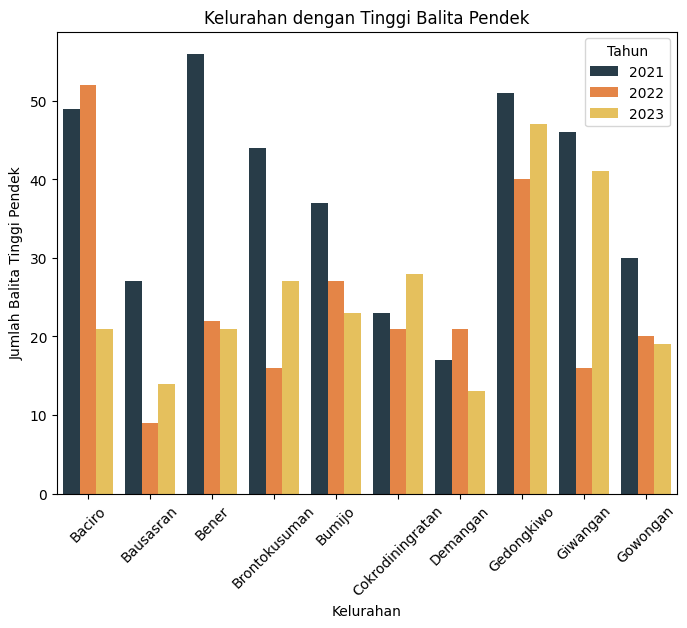

In [ ]:
# UNDERHEIGHT
df_tinggi_kurang.sort_values(by=['Kelurahan','tinggi_kurang'], ascending=[True,False], inplace=True)
df_tinggi_kurang_group = df_tinggi_kurang.groupby(['Kelurahan','Tahun']).first().reset_index()
df_tinggi_kurang_group.reset_index(drop=True, inplace=True)
tinggi_group = df_tinggi_kurang_group[:30].copy()

plt.figure(figsize=(8, 6))
palette = ['#233D4D', '#FE7F2D', '#FCCA46']
sns.barplot(x=tinggi_group['Kelurahan'], y=tinggi_group['tinggi_kurang'], hue=tinggi_group['Tahun'], palette=palette)
plt.xticks(rotation=45)
plt.xlabel('Kelurahan')
plt.ylabel('Jumlah Balita Tinggi Pendek')
plt.title('Kelurahan dengan Tinggi Balita Pendek')
plt.show()

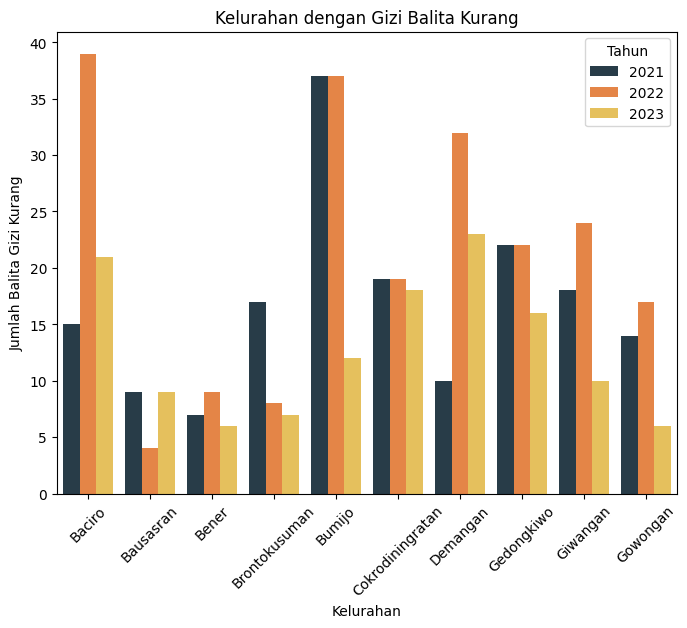

In [ ]:
# MALNUTRITION
df_gizi_kurang.sort_values(by=['Kelurahan','gizi_kurang'], ascending=[True,False], inplace=True)
df_gizi_kurang_group = df_gizi_kurang.groupby(['Kelurahan','Tahun']).first().reset_index()
df_gizi_kurang_group.reset_index(drop=True, inplace=True)
gizi_group = df_gizi_kurang_group[:30].copy()

plt.figure(figsize=(8, 6))  # Atur ukuran plot sesuai kebutuhan Anda
palette = ['#233D4D', '#FE7F2D', '#FCCA46']
sns.barplot(x=gizi_group['Kelurahan'], y=gizi_group['gizi_kurang'], hue=gizi_group['Tahun'], palette=palette)
plt.xticks(rotation=45)  # Mengatur sumbu x menjadi miring 45 derajat
plt.xlabel('Kelurahan')
plt.ylabel('Jumlah Balita Gizi Kurang')
plt.title('Kelurahan dengan Gizi Balita Kurang')
plt.show()

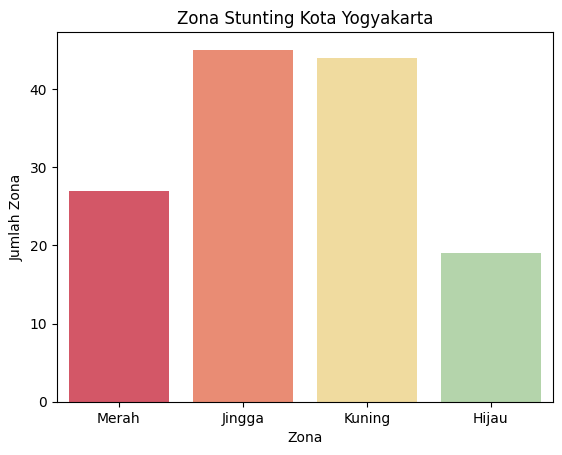

In [ ]:
palette = ['#e84258','#fd8060','#fee191','#b0dba4']
sns.countplot(df, x='Zona', palette=palette)
plt.xlabel('Zona')
plt.ylabel('Jumlah Zona')
plt.title('Zona Stunting Kota Yogyakarta')
plt.show()

## DATA PREPROCESSING

In [ ]:
# Check duplicate
print(f'duplicated data: {df.duplicated().sum()}')

# Check missing values
print(f'missing value: {df.isna().sum().sum()}')

duplicated data: 0
missing value: 0


In [ ]:
# Data reduction
df = df.drop(columns=['Puskesmas','Kelurahan','Tahun']).copy()

In [ ]:
# DATA TRANSFORMATION & NORMALIZATION
df.Zona = df.Zona.map({'Hijau':0, 'Kuning':1, 'Jingga':2, 'Merah':3})


In [ ]:
# split the data
X = df.drop(columns=['Zona'])
y = df['Zona']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
# normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# train the model on train set
model = SVC(C=100, gamma=1, kernel='linear')
model.fit(X_train, y_train)

# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.78      0.78      0.78         9
           2       0.86      0.75      0.80         8
           3       1.00      1.00      1.00         5

    accuracy                           0.85        27
   macro avg       0.87      0.88      0.87        27
weighted avg       0.85      0.85      0.85        27



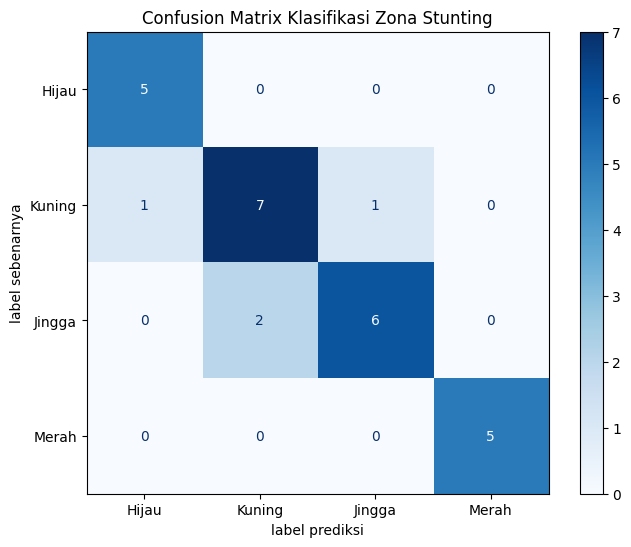

In [ ]:
# CONFUSSION MATRIX
# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

class_labels = ['Hijau','Kuning','Jingga','Merah']

# Create a ConfusionMatrixDisplay object and customize the plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix with labels and title
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xlabel('label prediksi')
plt.ylabel('label sebenarnya')
plt.title('Confusion Matrix Klasifikasi Zona Stunting')
plt.show()

In [ ]:
# COMPARE PREDICTED AND ACTUAL RESULTS
result = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
result.sort_index()

# Define a dictionary to map
label_mapping = {0: 'Hijau', 1: 'Kuning', 2: 'Jingga', 3: 'Merah'}

# Transform the columns
result['Actual'] = result['Actual'].map(label_mapping)
result['Predicted'] = result['Predicted'].map(label_mapping)

# Display the transformed DataFrame
result

,Actual,Predicted
98,Hijau,Hijau
67,Kuning,Jingga
105,Jingga,Jingga
19,Merah,Merah
42,Jingga,Kuning
62,Merah,Merah
12,Kuning,Hijau
110,Hijau,Hijau
125,Jingga,Jingga
128,Kuning,Kuning


In [ ]:
result.to_excel('result_normal.xlsx', index=False)

## OVERSAMPLING

In [ ]:
# we'll do oversampling since our target variables has imbalanced data
oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

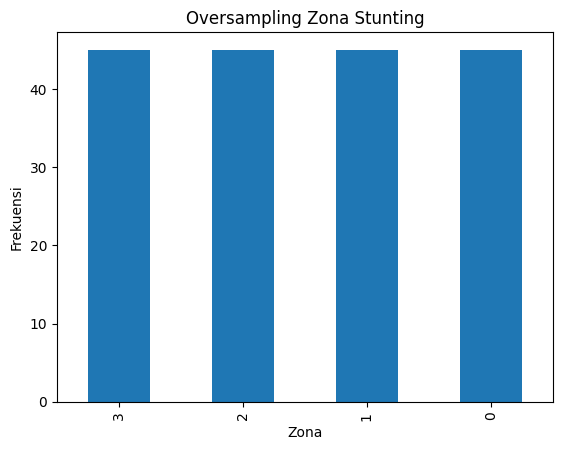

In [ ]:
y_resampled.value_counts().plot(kind='bar')
plt.xlabel('Zona')
plt.ylabel('Frekuensi')
plt.title('Oversampling Zona Stunting')
plt.show()

In [ ]:
# split the data again
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)

In [ ]:
# # normalize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train_r)
# X_test = scaler.transform(X_test_r)

In [ ]:
# HYPERPARAMETER TUNING
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
			'kernel': ['linear','rbf']}

grid_r = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid_r.fit(X_train_r, y_train_r)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.828 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.828 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.966 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.897 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.893 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.276 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.276 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.241 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.276 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.286 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.828 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid_r.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_r.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


In [ ]:
grid_r_predictions = grid_r.predict(X_test_r)

# print classification report
print(classification_report(y_test_r, grid_r_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      0.88      0.93         8
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.96      0.97      0.96        36
weighted avg       0.98      0.97      0.97        36



In [ ]:
# train the model on train set
model = SVC(C=0.1, gamma=1, kernel='linear')
model.fit(X_train_r, y_train_r)

# print prediction results
predictions = model.predict(X_test_r)
print(classification_report(y_test_r, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      0.88      0.93         8
           3       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.96      0.97      0.96        36
weighted avg       0.98      0.97      0.97        36



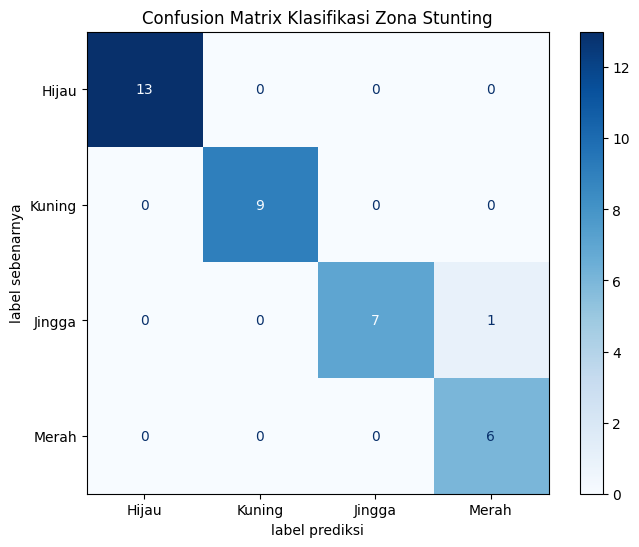

In [ ]:
# CONFUSSION MATRIX
# Create the confusion matrix
cm = confusion_matrix(y_test_r, predictions)

class_labels = ['Hijau','Kuning','Jingga','Merah']

# Create a ConfusionMatrixDisplay object and customize the plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix with labels and title
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xlabel('label prediksi')
plt.ylabel('label sebenarnya')
plt.title('Confusion Matrix Klasifikasi Zona Stunting')
plt.show()

In [ ]:
# COMPARE PREDICTED AND ACTUAL RESULTS
result = pd.DataFrame({'Actual':y_test_r, 'Predicted':predictions})

# Define a dictionary to map
label_mapping = {0: 'Hijau', 1: 'Kuning', 2: 'Jingga', 3: 'Merah'}

# Transform the columns
result['Actual'] = result['Actual'].map(label_mapping)
result['Predicted'] = result['Predicted'].map(label_mapping)
result.sort_index(ascending=1)

# Display the transformed DataFrame
result

,Actual,Predicted
19,Merah,Merah
42,Jingga,Jingga
153,Hijau,Hijau
78,Kuning,Kuning
145,Hijau,Hijau
15,Kuning,Kuning
24,Merah,Merah
68,Jingga,Jingga
113,Jingga,Jingga
118,Kuning,Kuning


In [ ]:
result.to_excel('result_oversampling.xlsx', index=False)